In [1]:
import glob
import cv2 
import math

from scipy.linalg import svd
from numpy import linalg as LA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = glob.glob("D:/ML Dataset/Euclidian_distance/RGB/*RGB.png")


In [3]:
# Rading dataset
gray_img = []
for img in path:
    n = cv2.imread(img)
    gray = cv2.cvtColor(n,cv2.COLOR_BGR2GRAY)
    gray = cv2.resize(gray,(720,1280))
    gray_img.append(gray)

In [4]:

sizeImg = gray_img[0].shape 


Gender = np.zeros((len(gray_img)))

i = 0

for filename in path:
    if "_Male_" in filename: 
        Gender[i]  = 0
    else:
        Gender[i]  = 1
        
    i = i+1
    
outputs = np.matrix(Gender).T

In [5]:
# Creating a matrix A which contain all images in column
r = gray_img[1].shape
A = np.zeros((r[0]*r[1],len(gray_img)))

for i in range(0, len(gray_img)):
    tmp = (np.array(gray_img[i]).reshape(-1))
    A[:,i] = np.array(tmp)
    


In [6]:
A.shape


(921600, 422)

In [7]:
# Subtracking mean value from each columan indivudial

NA = np.zeros((r[0]*r[1],len(gray_img)))

for i in range(0, len(gray_img)):
    mean = np.mean(A[:,i])
    NA[:,i] = A[:,i] - mean
    



In [8]:
# A_trnspose*A
CoreMat = np.matmul(NA.T,NA)
CoreMat.shape

(422, 422)

In [9]:
# 
eigval, eigvect = LA.eig(CoreMat)


In [10]:
ind = np.flip(np.argsort(eigval))

Ds = eigval[ind]
Vs = eigvect[:,ind]


In [11]:
sumofDs = np.sum(Ds)
accuracy = 0.8     # 1 -> 100%

tmp =0

for i in range(0,len(Ds)):
    tmp = tmp + Ds[i]
    print (tmp/sumofDs)
    if tmp/sumofDs > accuracy:
        break
        

basisVect = np.matmul(A,Vs[:,0:i+1])

i

# ans = np.resize(basisVect[:,0],(1280,720))
# plt.figure(figsize=(10,10))
# plt.imshow(ans)

0.3571194232782724
0.45587048127493685
0.5068349805798521
0.5485333877649624
0.5840080352711876
0.6112864252991052
0.6380887550994381
0.6556234516827439
0.670626369107016
0.6843670132992437
0.6972660356221118
0.7091141045627373
0.7208728392534792
0.7312315327564299
0.7402299564935726
0.747416927362313
0.7544162625756986
0.7607028521531886
0.7664081746582834
0.7718079453046374
0.7769206684421697
0.7817803952031287
0.7862991781045048
0.7907649310026068
0.7950421746731295
0.799188309096357
0.8029283026282257


26

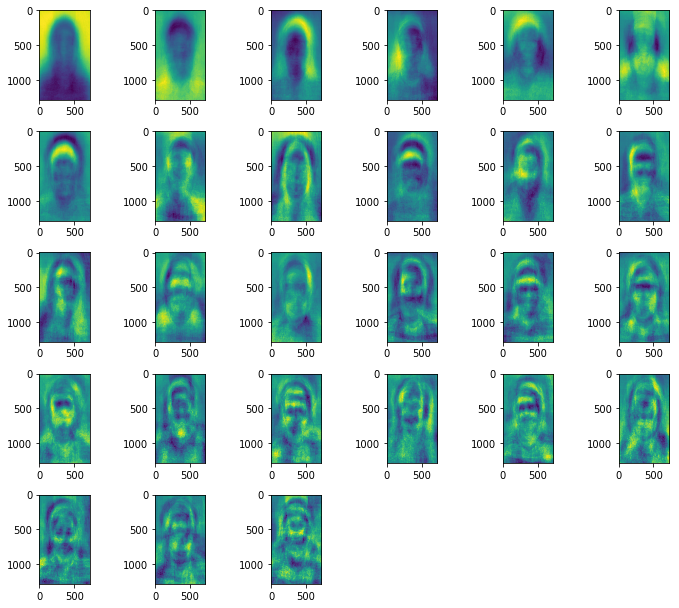

In [12]:
# Eigen Faces

ef = np.zeros((sizeImg[0], sizeImg[1], basisVect.shape[1]))
for i in range(0,basisVect.shape[1]):
     ef[:,:,i] = np.resize(basisVect[:,i],(sizeImg[0],sizeImg[1]))
        
        
x = math.ceil(math.sqrt(basisVect.shape[1]))

plt.figure(figsize=(10,10))

for i in range(0,basisVect.shape[1]):
    plt.subplot(x,x,i+1)
    #img = np.array(ef[:,:,i],dtype=np.uint16)
    img = ef[:,:,i]
    #plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    plt.imshow(img)
    
plt.tight_layout()

In [13]:
basisInv = LA.pinv(basisVect)
weights = np.matmul(basisInv,A)
weights.shape

(27, 422)

# Giving Test Image

In [68]:
#test_img = cv2.imread("D:/ML Dataset/Euclidian_distance/RGB/1641020_Male_Sad_RGB.png")
test_img = cv2.imread("D:/ML Dataset/Euclidian_distance/Sketch/1641020_Male_Fear_Sketch.png")
#test_img = cv2.imread("D:/ML Dataset/ICT_2016_photos/Nildeep Jadav.jpg")

test_gray = cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)
test_gray = cv2.resize(test_gray,(720,1280))

In [69]:
test_gray.shape

(1280, 720)

In [70]:
# Find weights of Image in terms of PCA

test_col = test_gray.reshape(-1)
mean = np.mean(test_col)
NT = test_col - mean
W = np.matmul(basisInv,NT)


In [71]:
err = 0
minval = abs(np.sum(10000000*W))
matchedim = []

print(minval)

index = -999


for i in range(0, len(gray_img)):
    err = sum(np.square(W - weights[:,i]))
    
    if err < minval:
        minval = err
        index = i
        matchedim = np.array(gray_img[i])
        

595928.4427272548


In [72]:
# plt.imshow(gray_img[index])

0.028334919268368227 



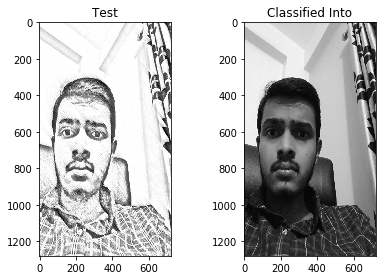

In [73]:
print(minval,"\n")

plt.subplot(1, 2, 1)
plt.imshow(test_img)
plt.title('Test')

plt.subplot(1, 2, 2)
plt.imshow(matchedim)
plt.imshow(cv2.cvtColor(matchedim,cv2.COLOR_GRAY2BGR))
plt.title('Classified Into')
             
plt.tight_layout()



### Test Area

In [74]:



# Backward loop

# for i in range(len(Ds)-1,-1,-1):
#     print(i)



# M = np.array([[1,0, 0, 0, 2],
#              [0, 0, 3, 0, 0],
#              [0, 0, 0, 0, 0],
#              [0, 2, 0, 0, 0]])

# M.shape


In [75]:
# U, s, VT = svd(M)
# print(U)
# print("\n")
# print(s)
# print("\n")
# print(VT)

In [76]:

# Creating Eigen Vectores and Values and sort them

# magicsquar = np.array([[17, 24,  1,  8, 15],
#        [23,  5,  7, 14, 16],
#        [ 4,  6, 13, 20, 22],
#        [10, 12, 19, 21,  3],
#        [11, 18, 25,  2,  9]])

# eigval, eigvect = LA.eig(magicsquar)

# print(eigval,"\n\n",eigvect)

# ind = np.flip(np.argsort(eigval))

# Ds = eigval[ind]
# Vs = eigvect[:,ind]

# print(Ds,"\n\n",Vs) 
